<a href="https://colab.research.google.com/github/leticiaram/Modelos_Estocasticos_2023/blob/main/Codigo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulación de Proceso Poisson

In [ ]:
# El siguiente código está basado en el código de  @sachinsdate
# https://gist.github.com/sachinsdate/d98b3a923aaa9055f19e4b5e820e1a14
import random
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sim_Poisson_Process(par_lambda, num_events):
  event_num = []
  inter_event_times = []
  event_times = []
  event_time = 0

  for i in range(num_events):
	  event_num.append(i)
	  #Get a random probability value from the uniform distribution's PDF
	  unif = random.random()

	  #Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
	  inter_event_time = -math.log(1.0 - unif) / par_lambda
	  inter_event_times.append(inter_event_time)

	  #Add the inter-event time to the running sum to get the next absolute event time
	  event_time = event_time + inter_event_time
	  event_times.append(event_time)

  return(event_num, inter_event_times, event_times)

In [ ]:
random.seed(10)
num_events =10
event_num, inter_event_times, event_times = sim_Poisson_Process(par_lambda=2, num_events=num_events)

### Conteos $\{N(t),t\in[0,t]\}$

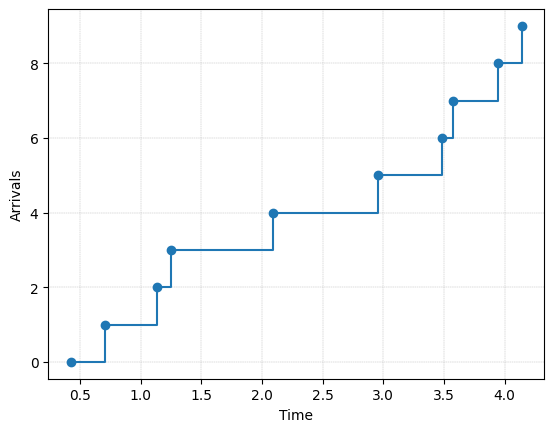

In [ ]:
plt.step(np.array(event_times, dtype=np.float32), np.array(event_num, dtype=np.float32), where='post')
plt.plot(np.array(event_times, dtype=np.float32), np.array(event_num, dtype=np.float32), 'C0o', alpha=1)
plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Arrivals')
plt.show()

## Tiempos de espera $\{W_i\}$

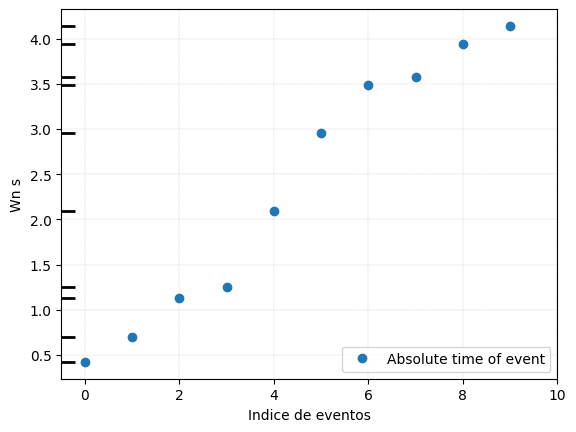

In [ ]:
fig, ax = plt.subplots(1, 1)
#plot the absolute event times
#fig = plt.figure()
#fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, event_times, 'o', label='Absolute time of event')
#ax.hlines(event_times, 0, event_num, colors='b', lw=3, alpha=0.5)
ax.hlines(event_times, -1, -0.2, colors='0', lw=2, alpha=1)
plt.legend(handles=[plot], loc='lower right')
plt.grid(linestyle = '--', linewidth = 0.2)
plt.xlim([-0.5, num_events])
plt.xlabel('Indice de eventos')
plt.ylabel('Wn s')
plt.show()


## Tiempos entre eventos $\{T_i\}$

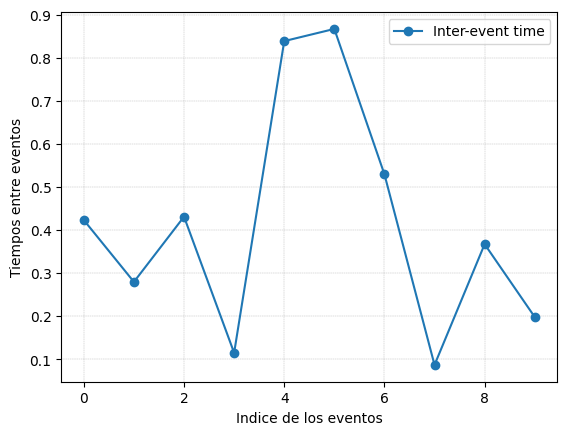

In [ ]:
#plot the inter-event times
fig = plt.figure()
#fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, inter_event_times, 'o-', label='Inter-event time')
plt.grid(linestyle = '--', linewidth = 0.3)
plt.legend(handles=[plot])
plt.xlabel('Indice de los eventos')
plt.ylabel('Tiempos entre eventos')
plt.show()